# Weight Prediction Using Random Forest Algorithm

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the data
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
#information about the data likenull values, column names and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
#shape of the data
df.shape

(500, 4)

In [6]:
#description of the data
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
#create a function to convert numerical values of the 'index' column to categorical values
def num_to_cat(ind):
    if(ind==0):
        return "Extremely week"
    if(ind==1):
        return "Weak"
    if(ind==2):
        return "Normal"
    if(ind==3):
        return "Overweight"
    if(ind==4):
        return "Obesity"
    if(ind==5):
        return "Extremely Obese"

In [8]:
df['Index'] = df['Index'].apply(num_to_cat)

In [9]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


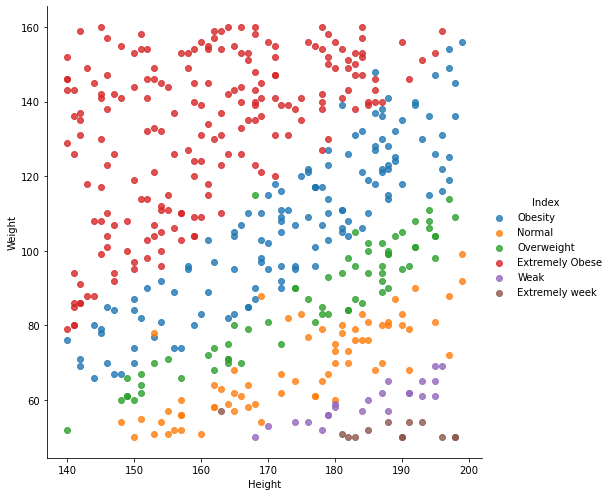

In [10]:
#let us plot height and weight and colour them accordingly to their weight.
# We are using sns.lmplot, which is just a scaler plot or we can spy a regression plot

sns.lmplot("Height", "Weight", df, hue="Index", size=7, aspect=1, fit_reg=False)

In [11]:
#let us analyse the value counts of the gender column
people = df['Gender'].value_counts()
people

Female    255
Male      245
Name: Gender, dtype: int64

In [12]:
#let us analyse the value counts of the index column
categories = df['Index'].value_counts()
categories

Extremely Obese    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely week      13
Name: Index, dtype: int64

In [13]:
#let us analyse the weight category distribution accordingly to gender 
#stats for men
df[df['Gender']=='Male']['Index'].value_counts()

Extremely Obese    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely week       6
Name: Index, dtype: int64

In [14]:
#stats for women
df[df['Gender']=='Female']['Index'].value_counts()

Extremely Obese    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely week      7
Name: Index, dtype: int64

In [15]:
#creating dummy variables out of the gender column
df2 = pd.get_dummies(df['Gender'])
df.drop('Gender', axis=1, inplace=True)
df=pd.concat([df,df2], axis=1)

In [16]:
df2.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [17]:
y = df['Index']
df = df.drop(['Index'], axis=1)

In [18]:
y.head()

0       Obesity
1        Normal
2       Obesity
3    Overweight
4    Overweight
Name: Index, dtype: object

In [19]:
# we are declaring a StandardScaler and scaling our data to bring everything on the same scale/range.
#this will help increase our model's accuracy and will also help in faster training.
s = StandardScaler()
df = s.fit_transform(df)
df = pd.DataFrame(df)

In [20]:
df.head()

,0,1,2,3
0,0.247939,-0.309117,-1.020204,1.020204
1,1.164872,-0.587322,-1.020204,1.020204
2,0.920357,0.123647,0.980196,-0.980196
3,1.531645,-0.061823,0.980196,-0.980196
4,-1.280283,-1.391027,-1.020204,1.020204


In [21]:
#let us split our data for training and testing purpose in 70% and 30% proportions respectively
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=101)

In [22]:
#by using GridSearchCV we can train our random forest model on multiple n_estimators
param_grid = {'n_estimators' : [100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, verbose=3)

In [23]:
#fitting our training data on weight category prediction model
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.857 total time=   0.3s
[CV 2/5] END ..................n_estimators=100;, score=0.886 total time=   0.4s
[CV 3/5] END ..................n_estimators=100;, score=0.829 total time=   0.4s
[CV 4/5] END ..................n_estimators=100;, score=0.786 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.900 total time=   0.2s
[CV 1/5] END ..................n_estimators=200;, score=0.843 total time=   0.4s
[CV 2/5] END ..................n_estimators=200;, score=0.900 total time=   0.4s
[CV 3/5] END ..................n_estimators=200;, score=0.843 total time=   0.3s
[CV 4/5] END ..................n_estimators=200;, score=0.829 total time=   0.3s
[CV 5/5] END ..................n_estimators=200;, score=0.886 total time=   0.3s
[CV 1/5] END ..................n_estimators=300;, score=0.843 total time=   0.6s
[CV 2/5] END ..................n_estimators=300;,

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 1000]},
             verbose=3)

In [24]:
#let us the best paramters
print(grid_cv.best_params_)

{'n_estimators': 200}


In [25]:
#let us make weight category predictions on test data
pred = grid_cv.predict(X_test)

In [27]:
#Let us print the classification report, confusion matrix and accuracy score on our weight category prediction model
print("Classification report -->") 
print('\n')
print(classification_report(y_test,pred))
print('\n')
print("Confusion matrix -->")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print("Accuracy Score -->", accuracy_score(y_test,pred)*100)

Classification report -->


                 precision    recall  f1-score   support

Extremely Obese       0.91      0.97      0.94        63
 Extremely week       1.00      1.00      1.00         1
         Normal       0.92      0.96      0.94        23
        Obesity       0.78      0.82      0.79        38
     Overweight       0.92      0.58      0.71        19
           Weak       0.83      0.83      0.83         6

       accuracy                           0.87       150
      macro avg       0.89      0.86      0.87       150
   weighted avg       0.88      0.87      0.87       150



Confusion matrix -->


[[61  0  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0 22  0  0  1]
 [ 6  0  0 31  1  0]
 [ 0  0  1  7 11  0]
 [ 0  0  1  0  0  5]]


Accuracy Score --> 87.33333333333333


In [63]:
# a function that will perform all the preprocessing for live prediction in the next step
def lp(details):
    gender=details[0]
    height=details[1]
    weight=details[2]
    if(gender=='Male'):
        details=np.array([[np.float(height),np.float(weight), 0.0,1.0]])
    elif(gender=='Female'):
        details=np.array([[np.float(height),np.float(weight), 1.0,0.0]])
    y_pred = grid_cv.predict(s.transform(details))
    return(y_pred[0])

In [64]:
#Live Prediction
your_details = ['Male', 175,80]
print(lp(your_details))

Overweight
